# Neural Network
The goal of this assignment is to get familiarized with building simple neural network models with fully-connected layers to perform classification and test it out on the CIFAR-10 dataset. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Data
hw_data_path = '/content/drive/MyDrive/Vanderbilt/Classes/Fall 2022/Machine Learning/Assignments/Assignment Week 9/'

%cd $hw_data_path
%pwd

/content/drive/MyDrive/Vanderbilt/Classes/Fall 2022/Machine Learning/Assignments/Assignment Week 9


'/content/drive/MyDrive/Vanderbilt/Classes/Fall 2022/Machine Learning/Assignments/Assignment Week 9'

## Task 1: Design Your Neural Network

In [ ]:
# A bit of setup
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from network import Network



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We use the class `Network` in the file `network.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [ ]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return Network(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Forward pass: compute scores
Open the file `network.py` and look at the method `Network.loss`. This function is to take the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

First, implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [ ]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720745909845e-08


### Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [ ]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


### Backward pass
In this step, it will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [ ]:
from gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738421e-09
b2 max relative error: 4.447625e-11


##Task 2: Network Training
To train the network we will use stochastic gradient descent (SGD). Complete the missing sections in `Network.train` to implement the training procedure. 
Then, You will also have to implement `Network.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a network on toy data. You should achieve a training loss less than 0.2.

iteration 0 / 100: loss 1.265861
Final training loss:  0.015634987611856756


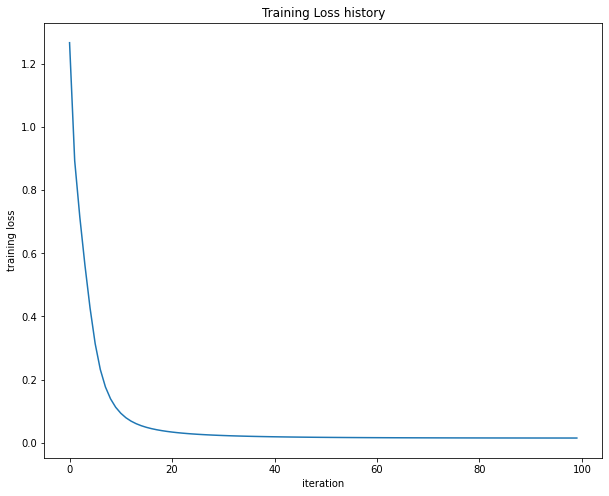

In [ ]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=True)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

### Load CIFAR-10
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [ ]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier.   
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './datasets/'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [ ]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = Network(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302970
iteration 100 / 1000: loss 2.302568
iteration 200 / 1000: loss 2.300021
iteration 300 / 1000: loss 2.271289
iteration 400 / 1000: loss 2.171102
iteration 500 / 1000: loss 2.128285
iteration 600 / 1000: loss 2.073168
iteration 700 / 1000: loss 2.033812
iteration 800 / 1000: loss 1.968908
iteration 900 / 1000: loss 1.950962
Validation accuracy:  0.27


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

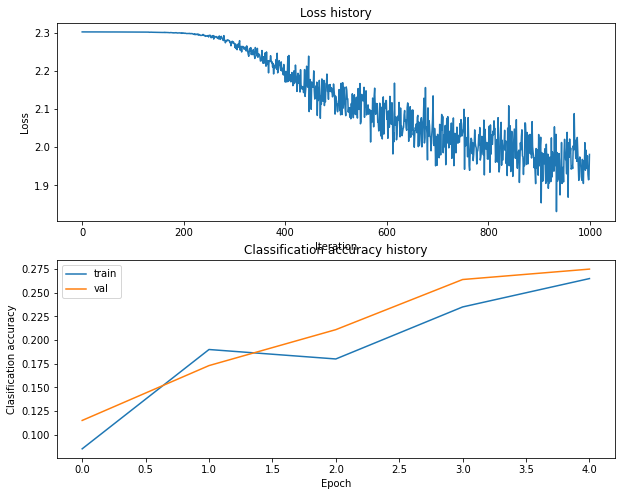

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

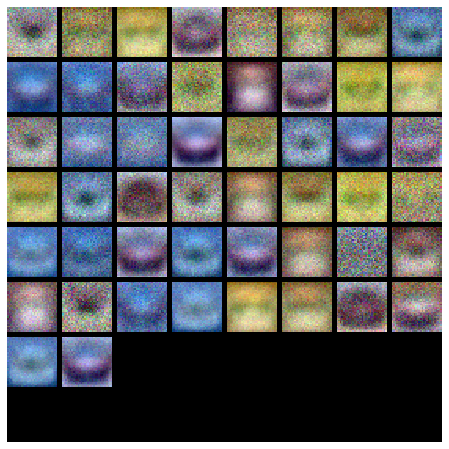

In [ ]:
from vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

##Task 3: Tune Your Network

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [ ]:
best_net = None # store the best model into this 
best_val = -1
best_stats = []
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################


input_size = 32 * 32 * 3
num_classes = 10

# Original Network Parameters
# hidden_size = 50
# num_iterations=1000
# batch_size=200
# learning_rate=1e-4
# learning_rate_decay=0.95
# reg=0.25

def create_network_params(hidden_size, num_iterations, batch_size, learning_rate=1e-4, learning_rate_decay=0.95):
  return { 
      "hidden_size": hidden_size, 
      "num_iterations": num_iterations, 
      "batch_size": batch_size, 
      "learning_rate": learning_rate,
      "learning_rate_decay": learning_rate_decay
  }

# This is equivalent to performing GridSearchCV manually
network_iterations = [
    create_network_params(25, 500, 100, 1e-3),
    # create_network_params(75, 1500, 300, 1e-3),
    # create_network_params(100, 2000, 400, 1e-3),
    create_network_params(150, 2500, 400, 1e-3),
    # create_network_params(175, 2500, 400, 1e-3),
    create_network_params(150, 5000, 400, 1e-3),
]

for net_params in network_iterations:
  hidden_size = net_params['hidden_size']
  num_iterations = net_params['num_iterations']
  batch_size = net_params['batch_size']
  learning_rate = net_params['learning_rate']
  learning_rate_decay = net_params['learning_rate_decay']

  # Build network
  net =  Network(input_size, hidden_size, num_classes)

  # Train the network
  stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=num_iterations, batch_size=batch_size,
            learning_rate=learning_rate, learning_rate_decay=learning_rate_decay,
            reg=0.25, verbose=True)

  # Predict on the validation set
  val_acc = (net.predict(X_val) == y_val).mean()
  print('Validation accuracy: ', val_acc)

  if val_acc > best_val:
    best_net = net
    best_val = val_acc
    best_stats = stats


#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

iteration 0 / 500: loss 2.302789
iteration 100 / 500: loss 2.057193
iteration 200 / 500: loss 1.736256
iteration 300 / 500: loss 1.879539
iteration 400 / 500: loss 1.720506
Validation accuracy:  0.434
iteration 0 / 2500: loss 2.303768
iteration 100 / 2500: loss 1.958074
iteration 200 / 2500: loss 1.774565
iteration 300 / 2500: loss 1.685114
iteration 400 / 2500: loss 1.608569
iteration 500 / 2500: loss 1.577007
iteration 600 / 2500: loss 1.498034
iteration 700 / 2500: loss 1.546720
iteration 800 / 2500: loss 1.460845
iteration 900 / 2500: loss 1.423933
iteration 1000 / 2500: loss 1.397545
iteration 1100 / 2500: loss 1.389769
iteration 1200 / 2500: loss 1.438191
iteration 1300 / 2500: loss 1.433241
iteration 1400 / 2500: loss 1.385669
iteration 1500 / 2500: loss 1.369292
iteration 1600 / 2500: loss 1.416649
iteration 1700 / 2500: loss 1.431321
iteration 1800 / 2500: loss 1.462305
iteration 1900 / 2500: loss 1.423139
iteration 2000 / 2500: loss 1.356388
iteration 2100 / 2500: loss 1.4040

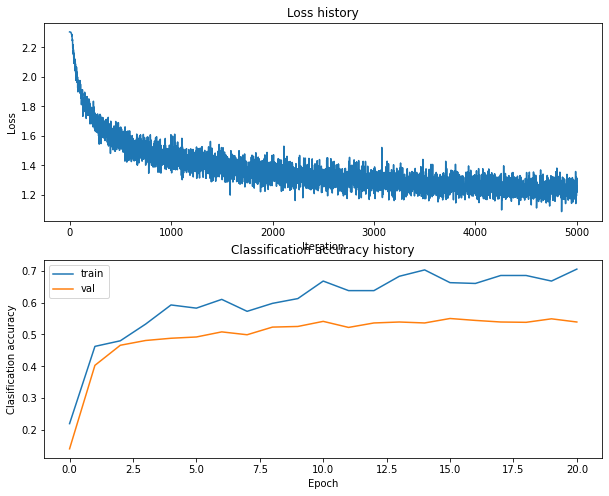

In [ ]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(best_stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(best_stats['train_acc_history'], label='train')
plt.plot(best_stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.legend()
plt.show()

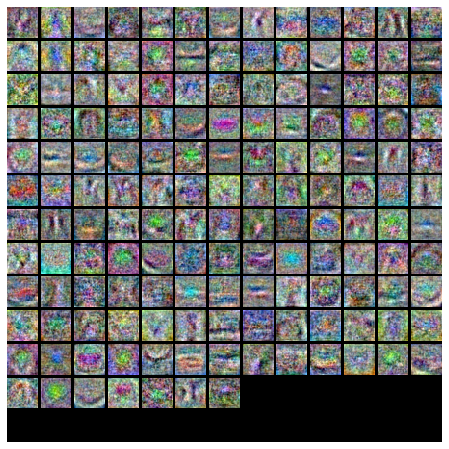

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

### Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.54


## Summary

### High-Level

This week's homework focused on constructing a two-layer neural network. The empahsis was on properly coding out various functions of the `network.py` file marked as `TODO` blocks.

Using code from the slides provided in this week's lessons, the network performs the three-step process to optimize its predictions. 

1. A forward pass is done on the input data, applying weights and biases, as well as the ReLU activation function at the hidden layer. 
2. Loss is calculated on the outputs, or scores, after the Softmax activation function is applied. L2 regularization is used to refine the loss and avoid over-fitting.
3. Backwards propagation is used with the scores and same regularization strength to calculate the derivatives and return them as gradients to be used in improving future iterations.

By running multiple iterations with the train method, calculating loss and gradients each time allows the weights to be updated to, ideally, perform better with each iteration.


### Tuning

In trying to refine the network's results on the CIFAR-10 dataset, multiple parameters in the network were altered:

return { 
      "hidden_size": hidden_size, 
      "num_iterations": num_iterations, 
      "batch_size": batch_size, 
      "learning_rate": learning_rate,
      "learning_rate_decay": learning_rate_decay
  }

* `hidden_size` - number of hidden nodes
* `num_iterations` - how many iterations to run during training
* `batch_size` - how large of a subset to use for sampling during training
* `learning_rate` - the speed at which weights change each iteration
* `learning_rate_decay` - the rate at which `learning_rate` decreases over time

I took the approach of trying multiple sets of parameters where most values either decreased or increased across the board. I chose not to touch `learning_rate_decay`, but I did make the `learning_rate` larger than the default at a constant value of `1e-3` across all parameter sets.

I got the best results with a very high `num_iterations` of `5000`, along with a larger `hidden_size` of `150` and larger `batch_size` of `400`. This seemed to provide both a better chance to sample the raw data and more opportunities to do so.

My final result on the test set was 54% accuracy. 


